In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import healpy as hp

In [29]:
frac = hp.read_map('/Volumes/TimeMachine/data/mocks/fracgood.hp256.fits')
mask = hp.read_map('/Volumes/TimeMachine/data/mocks/mask.cut.w.hp.256.fits').astype('bool')
frac[mask].sum()/mask.size

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.11020584514623083

In [2]:
from glob import glob

In [7]:
d0 = np.load('/Users/rezaie/Desktop/cl_uni_001_jack.npy').item()

In [3]:
mfs = glob('/Volumes/TimeMachine/data/mocks/3dbox/*/results/clustering/cl_uni.npy')

In [8]:
ds = []
for mi in mfs:
    d = np.load(mi).item()
    ds.append(d['auto'])
ds = np.array(ds)
ds.shape

(100, 513)

(1.0, 699.4126114582501)

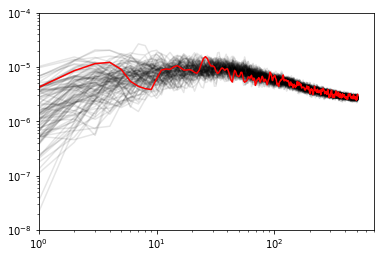

In [14]:
el = np.arange(513)

for i in range(100):
    plt.loglog(el, ds[i, :], color='k', alpha=0.1)
plt.loglog(el, d0['auto'], 'r-')
plt.ylim(1.e-8, 1.e-4)
plt.xlim(xmin=1.0)

In [32]:
err   = np.std(ds, axis=0, ddof=1)#/10 # 100 mocks
errj  = d0['clerr']['clerr']
errm  = d0['auto'] / np.sqrt(2*el+1.)#np.sqrt(0.5* (2*el+1) * 0.11020584514623083)

Text(0,0.5,'Error')

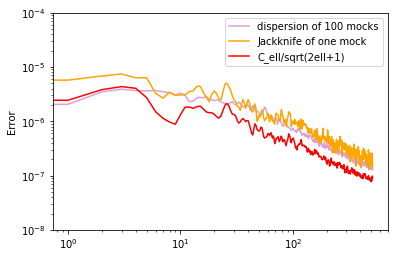

In [34]:
plt.plot(el, err,  'plum',   label='dispersion of 100 mocks')
plt.plot(el, errj, 'orange', label='Jackknife of one mock')
plt.plot(el, errm, 'red',    label='C_ell/sqrt(2ell+1)')
plt.legend()
plt.loglog()
plt.ylim(1.e-8, 1.e-4)
plt.ylabel('Error')

In [2]:
d = np.load('/Volumes/TimeMachine/data/DR7/results/clustering/cl_uni.npy').item()

Text(0,0.5,'C_ell')

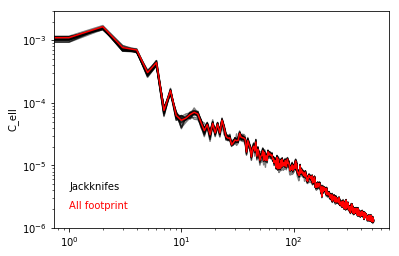

In [11]:
el = np.arange(513)
for i in range(20):
    cl = d['clerr']['cljks'][i]
    plt.loglog(el, cl, 'k', alpha=0.5)
plt.loglog(el, d['clerr']['cljks'][-1], 'r')
plt.ylim(1.e-6, 3.e-3)
plt.text(1., 4.e-6, 'Jackknifes', color='k')
plt.text(1., 2.e-6, 'All footprint', color='r')
plt.ylabel('C_ell')

#### 